<a href="https://colab.research.google.com/github/JVR27XD/MobileSAM/blob/main/NanoSAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%shell
if [ ! -e nanosam ]; then
    git clone https://github.com/NVIDIA-AI-IOT/nanosam.git
fi



In [2]:
%cd /content/nanosam


/content/nanosam


In [1]:
%%shell
if type nvidia-smi > /dev/null 2>&1; then
    pip install onnxruntime-gpu==1.17 --extra-index-url https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/
else
    pip install onnxruntime
fi


Looking in indexes: https://pypi.org/simple, https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/


In [4]:
from google.colab import drive
import os

# Montar Drive
drive.mount('/content/drive')

# Crear carpeta assets (si no existe)
os.makedirs("assets", exist_ok=True)

# Copiar tu modelo desde Drive
!cp "/content/drive/MyDrive/Colab Notebooks/TFG/NanoSam/mobile_sam.pt" assets/mobile_sam.pt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!python3 setup.py develop --user && echo "✅ Nanosam instalado como paquete"


python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


In [7]:
!pip install onnx


In [8]:
!pip install numpy==1.26.4 --force-reinstall


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 6.31.1 which is incompatible.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.31.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip uninstall -y onnxruntime onnxruntime-gpu onnx numpy protobuf


Found existing installation: onnxruntime 1.17.0
Uninstalling onnxruntime-1.17.0:
  Successfully uninstalled onnxruntime-1.17.0
Found existing installation: onnxruntime-gpu 1.17.0
Uninstalling onnxruntime-gpu-1.17.0:
  Successfully uninstalled onnxruntime-gpu-1.17.0
Found existing installation: onnx 1.18.0
Uninstalling onnx-1.18.0:
  Successfully uninstalled onnx-1.18.0
Found existing installation: numpy 2.3.0
Uninstalling numpy-2.3.0:
  Successfully uninstalled numpy-2.3.0
Found existing installation: protobuf 6.31.1
Uninstalling protobuf-6.31.1:
  Successfully uninstalled protobuf-6.31.1


In [14]:
%pip install numpy==1.26.4


In [1]:
pip install onnxruntime-gpu==1.17 --extra-index-url https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/


Looking in indexes: https://pypi.org/simple, https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/


In [2]:
import numpy as np
import onnxruntime as ort

print(f"✅ Numpy versión: {np.__version__}")
print(f"✅ ONNXRuntime versión: {ort.__version__}")



✅ Numpy versión: 1.26.4
✅ ONNXRuntime versión: 1.17.0


In [9]:
!mkdir -p data
!python3 -m nanosam.tools.export_sam_mask_decoder_onnx \
    --model-type vit_t \
    --checkpoint assets/mobile_sam.pt \
    --output data/mobile_sam_mask_decoder.onnx && echo "✅ Decoder .onnx exportado OK"



/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/content/nanosam/nanosam/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with nanosam.mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/content/nanosam/nanosam/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with 

In [21]:
import onnxruntime as ort


In [6]:
!pip install onnx


In [10]:
!pip install nvidia-pyindex nvidia-tensorrt


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.6 MB/s eta 0:00:00
  Created wheel for nvidia-pyindex: filename=nvidia_pyindex-1.0.9-py3-none-any.whl size=8419 sha256=182bda428fdfef89964fbc9fb1eabb0c6d56c00d891212dbca9430d85d44ae94
  Stored in directory: /root/.cache/pip/wheels/49/d0/7d/b68b3665d16ee20355e65fb7ef48b7ca26533217d9f09924fe
  Created wheel for tensorrt: filename=tensorrt-10.12.0.36-py2.py3-none-any.whl size=46638 sha256=cbe62af719cc4c9f00d422c184312d5757e4a584550c640d9a5748a385bfccba
  Stored in directory: /root/.cache/pip/wheels/15/7e/1d/fa229fa908a941f493812047b942b726d18e66f30fe2ac3854
  Created wheel for tensorrt_cu12: filename

In [30]:
!python export_engine.py \
    --onnx_model_path=data/MobileSam_SAMDecoder.onnx \
    --engine_output_path=data/mobile_sam_mask_decoder.engine \
    --use_fp16 True && echo "✅ Engine exportado OK"


[06/20/2025-13:37:59] [TRT] [W] Detected layernorm nodes in FP16.
[06/20/2025-13:37:59] [TRT] [W] Running layernorm after self-attention with FP16 Reduce or Pow may cause overflow. Forcing Reduce or Pow Layers in FP32 precision, or exporting the model to use INormalizationLayer (available with ONNX opset >= 17) can help preserving accuracy.
✅ TensorRT engine successfully saved to data/mobile_sam_mask_decoder.engine
✅ Engine exportado OK


In [34]:
!pip install pycuda --no-cache-dir && echo "✅ PyCUDA instalado OK"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 321.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 304.9 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2025.1.1-cp311-cp311-linux_x86_64.whl size=660712 sha256=0e96d6f4f1c3c35b9ec7ab3f9e56c04d21d423997fc93f337c1a414d5d26528e
  Stored in directory: /tmp/pip-ephem-wheel-cache-dh7ape5v/wheels/49/0a/64/6530a5fde64f984ebb4992e38744fdfd2a61f510377b3a24d9
Successfully built pycuda
✅ PyCUDA instalado OK


In [6]:
from src.infer_mobile_sam_trt10_v7 import InferenceEngine

engine = InferenceEngine(
    trt_model_1 = "/content/nanosam/data/mobile_sam_mask_decoder.engine"
)

print("✅ InferenceEngine creado OK")


✅ InferenceEngine creado OK
✅ InferenceEngine creado OK


In [7]:
from nanosam.mobile_sam import SamPredictor, sam_model_registry

# Cargar el encoder desde PyTorch (NO onnx)
model_type = "vit_t"
sam = sam_model_registry[model_type](checkpoint="/content/nanosam/assets/mobile_sam.pt")
sam.to("cuda")

predictor = SamPredictor(sam)

print("✅ Encoder (PyTorch) cargado OK")


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/content/nanosam/nanosam/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with nanosam.mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/content/nanosam/nanosam/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with 

✅ Encoder (PyTorch) cargado OK


In [8]:
import numpy as np
import onnxruntime as ort
import cv2

# ⚠️ Ruta a tu imagen
image_path = "/content/nanosam/assets/dogs.jpg"

# Cargar imagen
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# Normalizar imagen
img_input = cv2.resize(image, (1024, 1024)).astype(np.float32) / 255.0
img_input = np.transpose(img_input, (2, 0, 1))[None, :, :, :]

# Cargar el encoder .onnx
encoder_session = ort.InferenceSession(
    "/content/nanosam/data/MobileSam_SAMEncoder.onnx",
    providers=["CUDAExecutionProvider", "CPUExecutionProvider"]
)

# Infer embeddings
image_embeddings = encoder_session.run(
    output_names=["image_embeddings"],
    input_feed={"image": img_input}
)[0]

print(f"✅ Embeddings OK: {image_embeddings.shape}")


✅ Embeddings OK: (1, 256, 64, 64)


In [37]:
!pip install git+https://github.com/facebookresearch/segment-anything.git


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-tm0k1ch7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-tm0k1ch7
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=a2dadac455809086f0dfb12b73e40eaca4246ea69e0290a600c167eb1829f2bc
  Stored in directory: /tmp/pip-ephem-wheel-cache-0dn66_go/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [12]:
!python3 -m nanosam.tools.export_sam_mask_decoder_onnx \
    --model-type vit_t \
    --checkpoint assets/mobile_sam.pt \
    --output data/mobile_sam_mask_decoder.onnx

/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/content/nanosam/nanosam/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with nanosam.mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/content/nanosam/nanosam/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with 

In [21]:
import onnxruntime as ort
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Cargar imagen (ajusta la ruta si quieres otra imagen)
image_path = "/content/nanosam/assets/dogs.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Normalizar imagen
mean = np.array([123.675, 116.28, 103.53])
std = np.array([58.395, 57.12, 57.375])

input_size = 1024
h, w, _ = image.shape
scale = input_size / max(h, w)
resized_image = cv2.resize(image, (int(w * scale), int(h * scale)))

padded_image = np.zeros((input_size, input_size, 3), dtype=np.uint8)
padded_image[:resized_image.shape[0], :resized_image.shape[1], :] = resized_image

img_input = padded_image.transpose(2, 0, 1)
img_input = (img_input - mean[:, None, None]) / std[:, None, None]
img_input = img_input.astype(np.float32)  # <<< CORREGIDO
img_input = np.expand_dims(img_input, axis=0)

# Cargar ONNX encoder
encoder_path = "/content/nanosam/data/MobileSam_SAMEncoder.onnx"
encoder_session = ort.InferenceSession(
    encoder_path, providers=["CUDAExecutionProvider", "CPUExecutionProvider"]
)

# Infer embeddings
image_embeddings = encoder_session.run(
    output_names=["image_embeddings"],
    input_feed={"image": img_input}
)[0]

print("✅ Image embeddings shape:", image_embeddings.shape)


✅ Image embeddings shape: (1, 256, 64, 64)


In [24]:
# Definir puntos (puedes cambiar las coords)
point_coords = np.array([[[300, 400], [350, 450], [250, 370], [400, 480]]], dtype=np.float32)
point_labels = np.array([[1, 1, 1, 1]], dtype=np.float32)

# Cargar decoder ONNX
decoder_path = "/content/nanosam/data/MobileSam_SAMDecoder.onnx"
decoder_session = ort.InferenceSession(
    decoder_path, providers=["CUDAExecutionProvider", "CPUExecutionProvider"]
)

# Inferencia decoder
outputs = decoder_session.run(
    output_names=["masks", "scores"],
    input_feed={
        "image_embeddings": image_embeddings,
        "point_coords": point_coords,
        "point_labels": point_labels
    }
)

masks, scores = outputs

print("✅ Masks shape:", masks.shape)
print("✅ Scores:", scores)

# Visualizar
mask = masks[0, 0]
mask = cv2.resize(mask, (w, h))
mask = (mask > 0).astype(np.uint8) * 255

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask, alpha=0.5, cmap='jet')
plt.axis('off')
plt.title("Segmentación MobileSAM (.onnx)")
plt.show()


InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Got invalid dimensions for input: point_labels for the following indices
 index: 1 Got: 4 Expected: 2
 Please fix either the inputs/outputs or the model.

✅ Masks shape: (1, 1, 256, 256)
✅ Scores: [[0.8218913]]


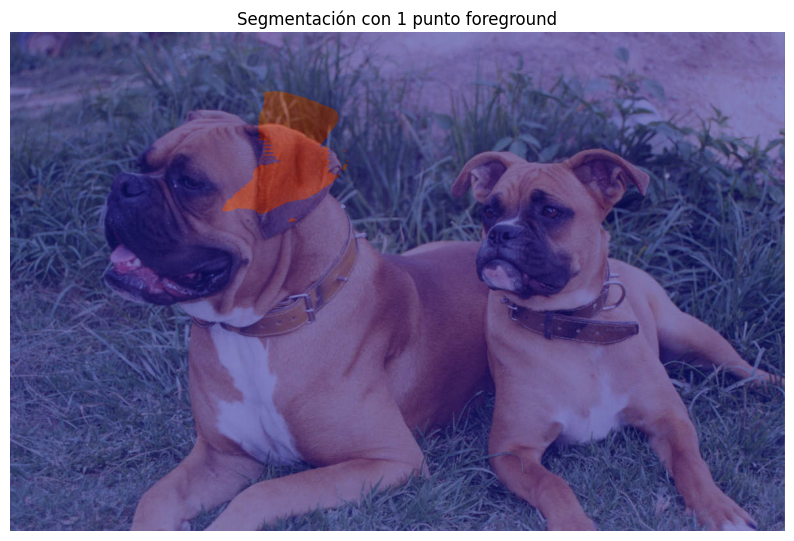

In [29]:
# 1 punto (foreground)
point_coords = np.array([[[400, 300], [0, 0]]], dtype=np.float32)
point_labels = np.array([[1, -1]], dtype=np.float32)

# Cargar decoder ONNX
decoder_path = "/content/nanosam/data/MobileSam_SAMDecoder.onnx"
decoder_session = ort.InferenceSession(
    decoder_path, providers=["CUDAExecutionProvider", "CPUExecutionProvider"]
)

# Inferencia
outputs = decoder_session.run(
    output_names=["masks", "scores"],
    input_feed={
        "image_embeddings": image_embeddings,
        "point_coords": point_coords,
        "point_labels": point_labels
    }
)

masks, scores = outputs

print("✅ Masks shape:", masks.shape)
print("✅ Scores:", scores)

# Visualizar
mask = masks[0, 0]
mask = cv2.resize(mask, (w, h))
mask = (mask > 0).astype(np.uint8) * 255

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask, alpha=0.5, cmap='jet')
plt.axis('off')
plt.title("Segmentación con 1 punto foreground")
plt.show()


✅ Masks shape: (1, 1, 256, 256)
✅ Scores: [[0.5636335]]


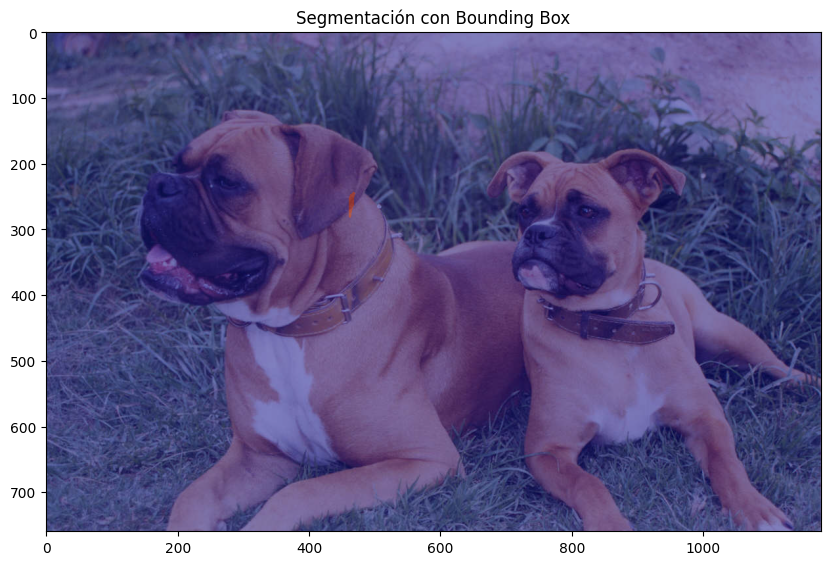

In [32]:
# Bounding box (x1, y1, x2, y2)
bbox = [400, 300, 400, 500]

# 2 puntos (top-left + bottom-right bbox)
point_coords = np.array([[[bbox[0], bbox[1]], [bbox[2], bbox[3]]]], dtype=np.float32)
point_labels = np.array([[2, 3]], dtype=np.float32)

# Inferencia
outputs = decoder_session.run(
    output_names=["masks", "scores"],
    input_feed={
        "image_embeddings": image_embeddings,
        "point_coords": point_coords,
        "point_labels": point_labels
    }
)

masks, scores = outputs

print("✅ Masks shape:", masks.shape)
print("✅ Scores:", scores)

# Visualizar
mask = masks[0, 0]
mask = cv2.resize(mask, (w, h))
mask = (mask > 0).astype(np.uint8) * 255

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask, alpha=0.5, cmap='jet')
plt.axis('on')
plt.title("Segmentación con Bounding Box")
plt.show()
